## Drop collumns and fill NaNs

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
# TODO one hot encoding
#pre classification, with less features?

In [28]:
'''
22 de junho de 2001 | Barragem rejeitos de minério em São Sebastião das Águas  Claras, município de Nova Lima (MG) . Mortos: 5 17 de junho de 2004 | Barragem de Camará, em Alagoa Nova (PB). | Mortos: 5 27 de maio de 2009  | Barragem hídrica de Algodões, nos municípios de Cocal e Buriti dos Lopes (PI). Mortos: 24 (9 no momento e 15 em decorrência) 5 de março de 2014 | Barragem de terra de uma fazenda no município de Uruana (GO) | Mortos: 2 29 de março de 2014 |Barreira provisória da hidrelétrica de Santo Antônio, em Laranjal do Jari (AP) | Mortos: 4 10 de setembro de 2014 | Barragem de rejeito uma mina em Itabirito (MG) | Mortos: 3 5 de novembro de 2015 | Barragem de rejeitos Fundão... - Veja mais em https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/02/03/brasil-registrou-65-mortes-em-9-incidentes-com-barragens-entre-2001-e-2018.htm?cmpid=copiaecola
'''

'\n22 de junho de 2001 | Barragem rejeitos de minério em São Sebastião das Águas  Claras, município de Nova Lima (MG) . Mortos: 5 17 de junho de 2004 | Barragem de Camará, em Alagoa Nova (PB). | Mortos: 5 27 de maio de 2009  | Barragem hídrica de Algodões, nos municípios de Cocal e Buriti dos Lopes (PI). Mortos: 24 (9 no momento e 15 em decorrência) 5 de março de 2014 | Barragem de terra de uma fazenda no município de Uruana (GO) | Mortos: 2 29 de março de 2014 |Barreira provisória da hidrelétrica de Santo Antônio, em Laranjal do Jari (AP) | Mortos: 4 10 de setembro de 2014 | Barragem de rejeito uma mina em Itabirito (MG) | Mortos: 3 5 de novembro de 2015 | Barragem de rejeitos Fundão... - Veja mais em https://noticias.uol.com.br/cotidiano/ultimas-noticias/2019/02/03/brasil-registrou-65-mortes-em-9-incidentes-com-barragens-entre-2001-e-2018.htm?cmpid=copiaecola\n'

In [29]:
df = pd.read_excel('SNISB 2018.xlsx', sheet_name='Cadastro')

## drop columns

In [30]:
df['Codigo_barragem_SNISB'].isnull().sum()

14957

In [31]:
df.drop(columns=['Codigo_barragem_Fiscalizador', 'Autorizacao_Numero',
                 'CNARH_Numero', 'Barragem_NomeSecundario', 'Empreendedor_Nome',
                 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo',
                 
                 'Cursodagua_barrado', 'Bacia_Hidrografica', 'UnidadeGestaoRecursosHidricos',
                 'Datum', 'Empreendedor Identificado?'], inplace=True)


In [32]:
df.drop(columns=['Codigo_barragem_SNISB','Autorizacao_Data_emissao_publicacao',
           'Autorizacao_Data_validade','Uso_Complementar','Regiao_Hidrografica_CNRH','Latitude_dec',
           'Longitude_dec','Barragem_Municipio','Dominio_Curso_Dagua','DataUltimaInspecao','TipoUltimaInspecao',
           'ComentariosObservacoes','Órgão fiscalizador','Barragem Pública ou particular','Barragem Outorgada?',
           'Tem informação de altura?','Tem informação de volume?','Tem informação de altura e volume?',
           'classificada quanto ao CRI?','classificada quanto ao DPA?','Houve alguma inspeção no período deste RSB?',
           'Cadastrada no SNISB?','N','sequência'], inplace=True)

In [34]:
#df['Construcao_Data_Inicio'].unique()

#df['Construcao_Data_Inicio'] = pd.to_datetime(df['Construcao_Data_Inicio'], errors='coerce') 

In [36]:
df['Construcao_Data_Inicio'].unique() #TODO | ORGANIZE PER YEAR. I NEED TO KOW THEIR AGE.


array([nan, datetime.datetime(2000, 1, 1, 0, 0),
       datetime.datetime(1905, 5, 31, 0, 0),
       datetime.datetime(1905, 4, 15, 0, 0), 2006, 2000, 2001, 1974, 2004,
       1999, 1938, 1964, 1960, 1962, 1968, 1956, 1958, 1955, 1953, 1954,
       1967, 1984, 2015, 2017, datetime.datetime(1995, 1, 1, 0, 0),
       datetime.datetime(2003, 1, 2, 0, 0),
       datetime.datetime(1995, 1, 2, 0, 0),
       datetime.datetime(2005, 1, 2, 0, 0),
       datetime.datetime(2006, 1, 2, 0, 0),
       datetime.datetime(1999, 1, 1, 0, 0),
       datetime.datetime(2013, 1, 3, 0, 0),
       datetime.datetime(1998, 1, 1, 0, 0),
       datetime.datetime(1991, 1, 2, 0, 0),
       datetime.datetime(2011, 1, 2, 0, 0),
       datetime.datetime(2007, 1, 1, 0, 0),
       datetime.datetime(2008, 1, 1, 0, 0),
       datetime.datetime(2014, 1, 1, 0, 0),
       datetime.datetime(2015, 1, 2, 0, 0),
       datetime.datetime(2000, 1, 2, 0, 0),
       datetime.datetime(1996, 1, 2, 0, 0),
       datetime.datetime(2010,

In [38]:
#pd.to_datetime(df['Construcao_Data_Inicio'], errors='raise')
#new_series = sr.dt.year 

In [40]:
df["Barragem_Altura_AcimaBaseFundacao"] = pd.to_numeric(df["Barragem_Altura_AcimaBaseFundacao"], errors='coerce')

In [42]:
df["Barragem_Capacidade"] = pd.to_numeric(df["Barragem_Capacidade"], errors='coerce')

In [36]:
df["Barragem_Capacidade"].isnull().sum()

2479

In [43]:
df.dtypes

Barragem_Nome                                                          object
Barragem_Altura_AcimaBaseFundacao                                     float64
Barragem_Altura_AcimaNivelTerreno                                     float64
Barragem_Capacidade                                                   float64
Barragem_Principal_Tipo_material                                       object
Barragem_Principal_Tipo_estrutural                                     object
Barragem_Principal_comprimento                                        float64
Construcao_Data_Inicio                                                 object
Construcao_Data_Fim                                                    object
Uso_principal                                                          object
Classe Residuo                                                         object
Barragem_UF                                                            object
Barragem_nivel_de_perigo                                        

In [93]:
#df.fillna('NaN', inplace = True)

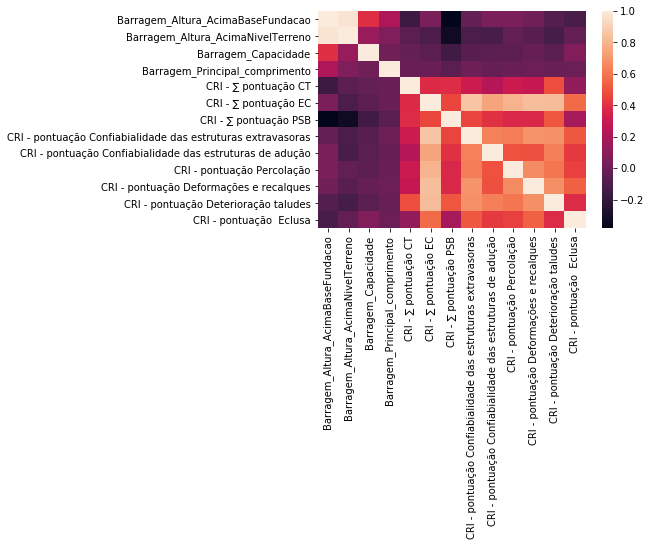

In [50]:
#df.corr()
sns.heatmap(df.corr())